## Gaussians and Entropy

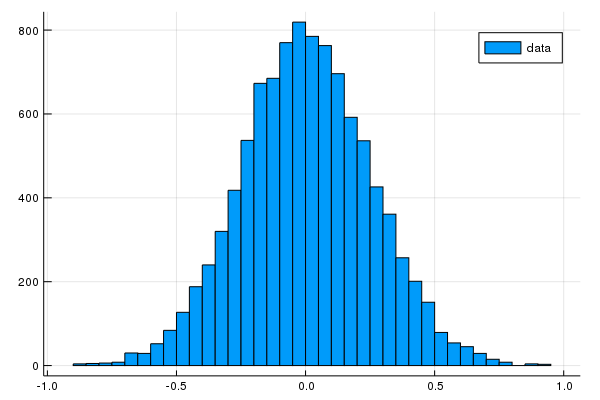

In [1]:
# generate 10000 data points from a gaussian distribution
using Plots, Random, Distributions, StatsBase
using LinearAlgebra, SpecialFunctions
σ = 0.25
d = Normal(0,σ)
x = rand(d, 10000)
histogram(x, fmt = :png, legend=:topright, label="data")

In [2]:
w = fit(Histogram, x).weights

10-element Array{Int64,1}:
    9
   73
  451
 1515
 2947
 2836
 1580
  485
   97
    7

In [9]:
# compute entropy naively 
# can because all weights are non-zero
- sum( (w ./ sum(w)) .* (log.(w ./ sum(w))) )

1.67370233528767

In [4]:
# closed form expression for entropy in 1D
H(σ) = log( 2 * pi * exp(1) * σ^2) / 2.0

H (generic function with 1 method)

In [5]:
H(σ)

0.032644172084782055

In [6]:
# Ahmed and Gokhale estimate of entropy
# see: http://www.nowozin.net/sebastian/blog/
#       the-entropy-of-a-normal-distribution.html
function entropy_ag(X)
    # X is a (k,n) matrix, samples in columns
    k = size(X,1)
    n = size(X,2)
    C = zeros(k,k)
    for i=1:n
        C += X[:,i]*X[:,i]'
    end
    H = 0.5*k*(1.0 + log(pi)) + 0.5*logdet(C)
    for i=1:k
        H -= 0.5*digamma(0.5*(n+1-i))
    end
    H
end

entropy_ag (generic function with 1 method)

In [7]:
entropy_ag(x')

0.036757314248802686

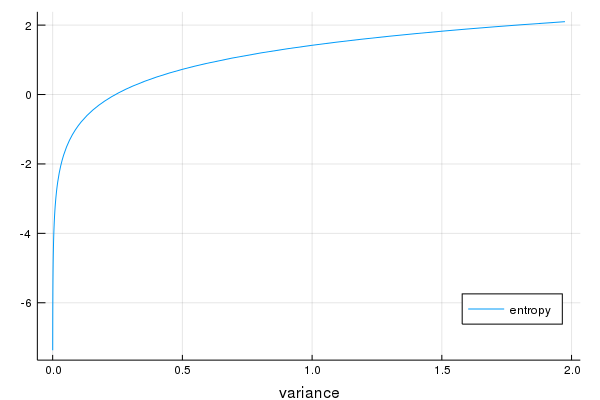

In [10]:
# to see how entropy changes with variance
plot(H,0,2, fmt = :png, legend=:bottomright, 
    label="entropy", xlabel="variance")

### In more than one dimension

In [11]:
# generate a positive definite hermitian matrix
n = 2
Σ = rand(n,n)
Σ = Σ + Σ'
Σ = Σ + n * I

2×2 Array{Float64,2}:
 3.84508   0.802175
 0.802175  3.97196 

In [12]:
d = MvNormal(Σ)

ZeroMeanFullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [3.84508 0.802175; 0.802175 3.97196]
)


In [13]:
length(d)

2

In [14]:
mean(d)

2-element Array{Float64,1}:
 0.0
 0.0

In [15]:
cov(d)

2×2 Array{Float64,2}:
 3.84508   0.802175
 0.802175  3.97196 

In [16]:
# MvNormal's built in estimate of entropy
entropy(d)

4.179381175069598

In [17]:
# test the Ahmed and Gokhale estimate
x = rand(d, 10000)
entropy_ag(x)

4.187548414056548

In [18]:
# closed form expression
log( (2 * pi * exp(1))^length(d) * det(cov(d)) ) / 2.0

4.179381175069598

In [38]:
# A naive estimate of entropy 
# in more than one dimension
function entropy_naive(X,bins=10)
    eps = 0.0000001
    (d,n) = size(X)
    (dim= d, length= n)
    counts = reshape(zeros(Int16, bins^d),
        Tuple([bins for i in 1:d]))
    min = minimum(x)
    max = maximum(x) + eps
    step = (max-min)/(bins)
    for i=1:n
        ind = [Int16(floor((x[j,i]-min)/step))+1 
            for j in 1:d]
        counts[Tuple(ind)...]+=1
    end
    c = counts[counts .> 0]
    ent = -sum( (c ./ sum(c)) .* (log.(c ./ sum(c))) )
    return (entropy = ent, histogram = counts)
end

entropy_naive (generic function with 2 methods)

In [41]:
# naive estimate with carefully selected bin count
entropy_naive(x,16).entropy

4.199358126876757

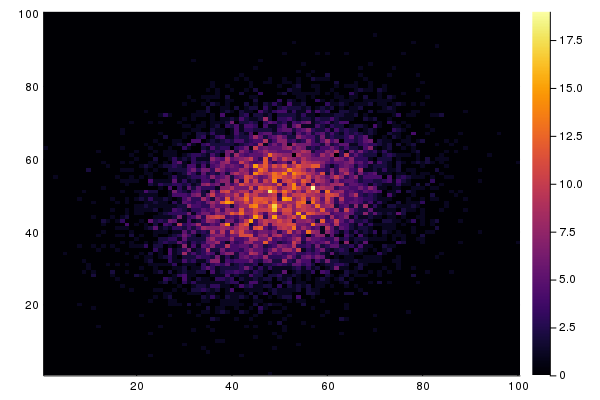

In [42]:
heatmap(entropy_naive(x,100).histogram, fmt = :png)

In [43]:
# to see that the naive method is naive
# we try it out with different bin counts
trials = [ entropy_naive(x,bins).entropy for bins in 3:100 ];

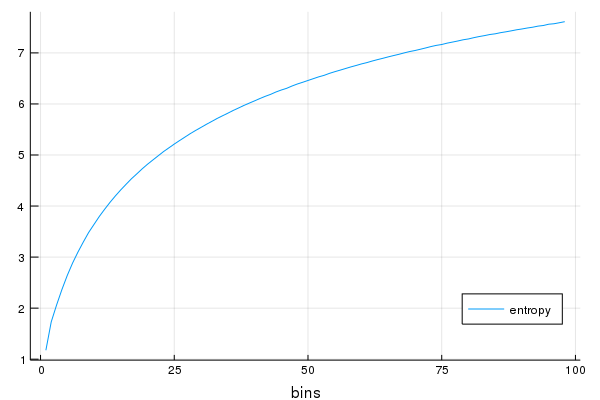

In [44]:
plot(trials, fmt = :png, legend=:bottomright, 
    label="entropy", xlabel="bins")